# A study on gun ownership and gun violence in the US

## Introduction 
Questions:
- Is socioeconomic status related to gun ownership?
- Is socioeconomic status related to gun violence?
- Is political standing related to gun ownership?
- Is political standing related to gun violence?
- Are suicide rates related to gun ownership?
- Is gun violence related to gun ownership? 


## Dataset Preparation
Datasets:
- The datasets I used where from a variety of sources including, The CDC, U.S. Department of Health & Human Services, NGA, NCSL, NAAG, NAIC, and the Kaiser Foundation and the Washington Post
- The data on gun ownership specifically was gathered in 2001 by the Behavioral Risk Factor Surveillance System (BRFSS) and surveyed 201,881 people from different states 
- The datasets looked at socioeconomic status in states, politics in states, suicide rates, run ownership and gun violence
    - The data presented is from percentages of people in aa given state who answered either yes or no to the question "Are any firearms now kept in or around your home? Include those kept in a garage, outdoor storage area, car, truck, or other motor vehicle."

What I did to prepare data:
- Excel:
    - First after downloading all the datasets I inserted them all into one excel spreadsheet by state
        - Some data on regions such as the District of Columbia and Puerto Ricco and the US as a whole had to be deleted 
    - I then also deleted unnecessary headers to only leave one line and deleted extra sources that where in the file
    - I then edited excessively long headers to be more manageable 
- Python
    - I then imported to file into Jupiter
    - For the political party data, I replaced the strings, republican and democrat with 1 and 2 to make it easier to correlate later
        - I then replaced anything that wasn’t entered as republican or democrat as 0, grouping them all together
        - I left out the other options, such as independent, because there weren’t enough of them, so I was worried the lack of data would mess up the corelations.
            - The groups we left out included when the majority was independent, or when there wasn't a majority (split), when it was not applicable such as Nebraska, or like when the attorney general was appointed. The insurance commissioner for many states was appointed, mostly rendering it useless. 
           


In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#(yes i know i probably dont need most of this...)

In [2]:
data = pd.read_csv('raw_dataCLEANED02.csv') #read in file to dataframe
data[:5]

,Location,BelowPoverty,AbovePoverty,HouseholdIncome,GovernorParty,SenateParty,HouseParty,AttorneyGeneralParty,InsuranceCommissionerParty,SuicideRate,SuicideDeaths,GunDeathRate,GunDeaths,TotalNumberResponents,YesOwn,YesOwnRate,NoOwn,NoOwnRate
0,Alabama,0.17,0.84,47221,Republican,Republican,Republican,Republican,Appointed,14.9,750,19.6,958,2623,1294,51.7,1329,48.3
1,Alaska,0.13,0.87,75723,Independent,Republican,Republican,Appointed,Appointed,26.9,201,23.4,177,2716,1627,57.8,1089,42.2
2,Arizona,0.16,0.84,57100,Republican,Republican,Republican,Republican,Appointed,18.2,1276,13.8,970,3066,989,31.1,2077,68.9
3,Arkansas,0.16,0.84,45907,Republican,Republican,Republican,Republican,Appointed,19.1,577,16.9,520,2780,1431,55.3,1349,44.7
4,California,0.14,0.86,66637,Democrat,Democrat,Democrat,Democrat,Democrat,10.3,4167,7.7,3095,3897,846,21.3,3051,78.7


In [3]:
def anythingBut2(data, value, value2):
    i=0
    #x=0
    n=len(data)
    while(i<n):    
        if(data[i] != value and data[i] != value2):
            data[i]=0
        i=i+1

for c in data.columns:
    if c == 'GovernorParty' or c == 'SenateParty' or c == 'HouseParty' or c == 'AttorneyGeneralParty' or c == 'InsuranceCommissionerParty':
        data[c] = data[c].replace('Republican', 1)
        data[c] = data[c].replace('Democrat', 2)
        anythingBut2(data[c], 1,2) 
        #print(data[c])

print("done")
data[:5]




C:\Users\maxsk\OneDrive\Documents\Programs\ANACONDA\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


done


,Location,BelowPoverty,AbovePoverty,HouseholdIncome,GovernorParty,SenateParty,HouseParty,AttorneyGeneralParty,InsuranceCommissionerParty,SuicideRate,SuicideDeaths,GunDeathRate,GunDeaths,TotalNumberResponents,YesOwn,YesOwnRate,NoOwn,NoOwnRate
0,Alabama,0.17,0.84,47221,1,1,1.0,1,0,14.9,750,19.6,958,2623,1294,51.7,1329,48.3
1,Alaska,0.13,0.87,75723,0,1,1.0,0,0,26.9,201,23.4,177,2716,1627,57.8,1089,42.2
2,Arizona,0.16,0.84,57100,1,1,1.0,1,0,18.2,1276,13.8,970,3066,989,31.1,2077,68.9
3,Arkansas,0.16,0.84,45907,1,1,1.0,1,0,19.1,577,16.9,520,2780,1431,55.3,1349,44.7
4,California,0.14,0.86,66637,2,2,2.0,2,2,10.3,4167,7.7,3095,3897,846,21.3,3051,78.7


## Data Modeling
Mathematical / statistical models used:
- I used Pearson Corelation Coefficients that I ended up coding in myself instead of using the package because I has having problems debugging code and mine was more straightforward and easier to diagnose problems in and uses the Pearson Corelation Coefficient formula to find the r values
     - I used Pearson corelation coefficients because I wanted to be able to find if there was any corelation in the data and Pearson corelation coefficients is a terrific way to do that 
- I then ran correlations on the socioeconomic data, political data, suicide rate data, gun death data and corelated it with gun ownership
- Then I ran correlations on the socioeconomic data, political data, suicide rate data, gun ownership data and corelated it with gun related deaths 


In [4]:
def sumOfData(data):
    i=0
    total=0
    n=len(data)
    while(i<n):
        total = total +data[i]
        if(data[i]!=data[i]):
            print("i=",i, "  data[i] = ", data[i])
        i=i+1
        
    return total


def sumOfSqr(data):
    i=0
    total=0
    n=len(data)
    while(i<n):
        total = total + (data[i]*data[i])
        
        i=i+1
    return total

def sumOfProductOfPairs(data1, data2):
    i=0
    total=0
    n=len(data1)
    if(n!=len(data2)):
        raise ValueError('Data is of different lengths aaah')
                         
    while(i<n):
        total = total + (data1[i]*data2[i])
        i=i+1
    return total

def pearson(x,y):
    n=len(x)
    if(n!=len(y)):
        raise ValueError('x,y is of different lengths aaah')
    
    sumOfx=sumOfData(x) 
    sumOfy=sumOfData(y)
                         
    a=(n * sumOfProductOfPairs(x,y)) - (sumOfx * sumOfy)
    b=((n * sumOfSqr(x)) - (sumOfx * sumOfx))
    c=((n * sumOfSqr(y)) - (sumOfy * sumOfy))                  
    
    r=a/(math.sqrt(b*c))
    if(sumOfx!=sumOfx):
        print("sumOfx is nan aaahh")
    if(sumOfy!=sumOfy):
        print("sumOfy is nan aaahh")
    
        
    return r
print("done")

done


In [5]:

        
        
#create a list of correlation coeffcients 
r_vals = []
r_vals2 = []
for c in data.columns:
    
    if c != 'Location':
        i=0
        n=len(data)
        while(i<n):    
            data[c][i] = data[c][i] +0
            i=i+1
        
        
        #calculate the coefficient and append it to our list
        r = pearson(data[c], data['YesOwnRate'])
        r2 = pearson(data[c], data['GunDeathRate'])

        #r = np.corrcoef(data[c], data['YesOwnRate'], True)[0, 1]

        r_vals.append(r) 
        r_vals2.append(r2) 

        print("Correlation in YesOwnRate and", c, " is   ", r)
        print("Correlation in GunDeatnRate and", c, " is ", r2)
        print()

print("done")

C:\Users\maxsk\OneDrive\Documents\Programs\ANACONDA\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Correlation in YesOwnRate and BelowPoverty  is    0.388930997825
Correlation in GunDeatnRate and BelowPoverty  is  0.578147247632

Correlation in YesOwnRate and AbovePoverty  is    -0.395897112729
Correlation in GunDeatnRate and AbovePoverty  is  -0.578821245206

Correlation in YesOwnRate and HouseholdIncome  is    -0.505815769539
Correlation in GunDeatnRate and HouseholdIncome  is  -0.556487905833

Correlation in YesOwnRate and GovernorParty  is    -0.370708045704
Correlation in GunDeatnRate and GovernorParty  is  -0.380616785458

Correlation in YesOwnRate and SenateParty  is    -0.507862883136
Correlation in GunDeatnRate and SenateParty  is  -0.30519883833

Correlation in YesOwnRate and HouseParty  is    -0.636453228736
Correlation in GunDeatnRate and HouseParty  is  -0.475681819129

Correlation in YesOwnRate and AttorneyGeneralParty  is    -0.241769309001
Correlation in GunDeatnRate and AttorneyGeneralParty  is  -0.269405743329

Correlation in YesOwnRate and InsuranceCommissionerPar

## Data Analysis and Conclusion
Conclusions:
- I found that the areas that corelated most closely with gun ownership in states where, gun deaths, suicide rates, the party of the state house majority political affiliation, then income
- For gun related deaths in states, the closest corelated where gun ownership, suicide rates, percent of people below the poverty line, then household income, and then the party of the state house majority political affiliation
- This could possibly show that if we reduced the amount of people with guns (enforced more restrictive gun laws) we would reduce gun deaths and suicide rates, although correlation isn't the same thing as causation, so we can't say for sure

Additional questions/additional exploration:
- I would be interested in whether the stats would change much and if so how much if instead of number of people who own guns in a state, I used number of guns in the state
- I also wanted to know how rural vs urban would affect the statistics, and breaking down the data to county instead of state, because counties and cities are often much more representative of the people living there than states  


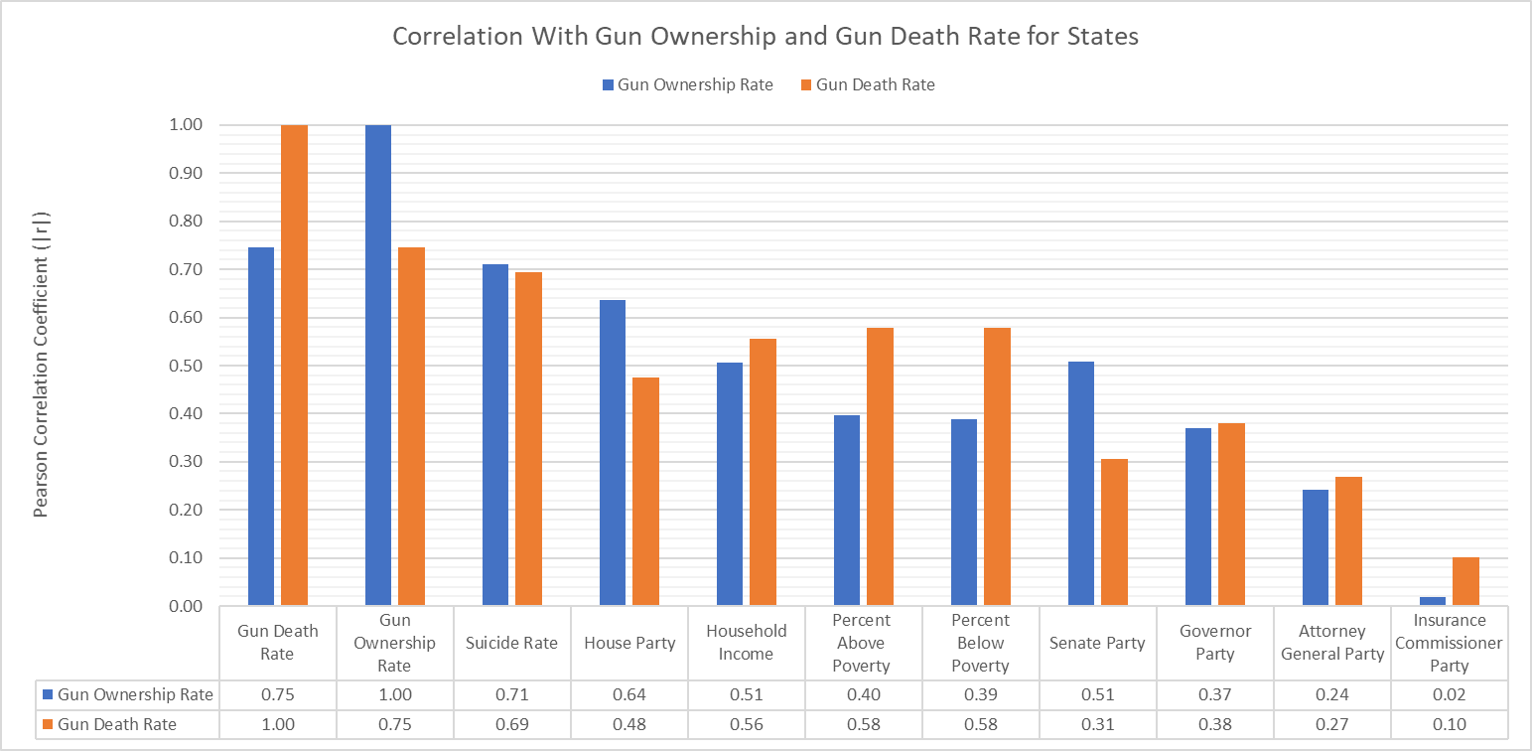

## Acknowledgements
- Myself
    - I used some come from previous projects
- Louis Lafreniere
    - Helping me debug everything
- Dr. Google
    - How to throw an error in python
    - The formula for calculating Pearson Corelation Coeficients 
- Manav Sehgal 
    - How to replace values in dataframes